<a href="https://colab.research.google.com/github/marinaladeira/test_pr/blob/main/fireflies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install networkx matplotlib
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("treated_data.csv", nrows=1000)
data

,INDICE,LATITUDE,LONGITUDE,CODIGO_ROTA,SEQUENCIA,LOGRADOURO,NUMERO
0,401103972.0,-22.858956,-43.338632,70324,3360.0,mons inacio da silva,545
1,402281829.0,-22.830781,-43.395010,8848,309.0,maria eliza,80
2,400507411.0,-22.821902,-43.415018,7446,254.0,dona lurdes,4
3,400533412.0,-22.834372,-43.410329,7557,80.0,lucio jose filho,81
4,400515070.0,-22.861150,-43.338667,70324,3180.0,mar del plata,490
...,...,...,...,...,...,...,...
995,401734936.0,-22.835348,-43.354306,77107,151.0,myron clark,79
996,400341604.0,-22.895061,-43.314664,8673,4410.0,silvia,55
997,400081233.0,-22.858032,-43.314083,7174,48.0,igramirim,133
998,400155839.0,-22.860312,-43.264246,79107,157.0,dr noguchi,271


In [10]:
coordinates = data[["LATITUDE", "LONGITUDE"]].values
k = 4
knn = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree', metric='haversine')
knn.fit(np.radians(coordinates))
distances, indices = knn.kneighbors(np.radians(coordinates))

# Remove o próprio ponto dos resultados (o ponto mais próximo de cada ponto é ele mesmo, na primeira posição)
indices = indices[:, 1:]
distances = distances[:, 1:]  # Converta distâncias de radianos para quilômetros
distances *= 6371  # Raio aproximado da Terra em km

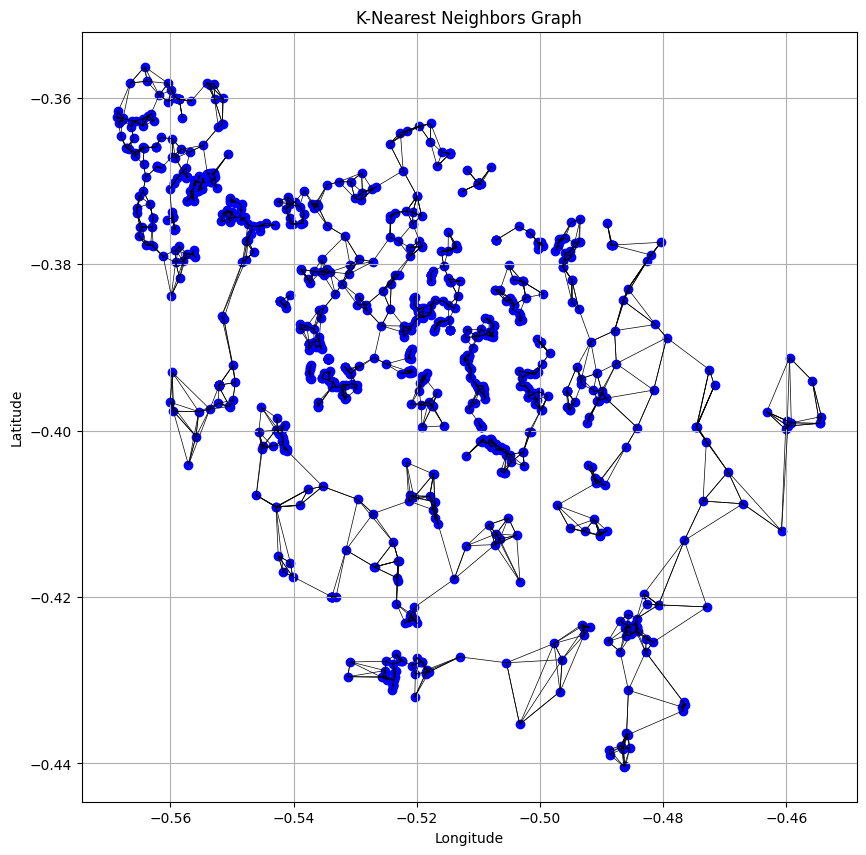

In [11]:
# Converter as coordenadas de radianos para coordenadas cartesianas para visualização
# Isso é necessário apenas se você deseja uma representação simples em 2D dos pontos
x_coords = np.cos(coordinates[:, 0]) * np.cos(coordinates[:, 1])
y_coords = np.cos(coordinates[:, 0]) * np.sin(coordinates[:, 1])

plt.figure(figsize=(10, 10))  # Configurar o tamanho da figura
plt.title('K-Nearest Neighbors Graph')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Desenhar cada ponto
for i in range(len(coordinates)):
    plt.scatter(x_coords[i], y_coords[i], color='blue')  # Desenhar o ponto

    # Desenhar uma linha do ponto i para cada um dos seus vizinhos
    for j in indices[i]:
        plt.plot([x_coords[i], x_coords[j]], [y_coords[i], y_coords[j]], 'k-', linewidth=0.5)

plt.grid(True)  # Ativar a grade no gráfico
plt.show()


In [12]:
class Graph:
    def __init__(self, vertices):
        self.v = vertices
        self.adj_list = {i: [] for i in range(vertices)}

    def add_edge(self, i, j, weight):
        self.adj_list[i].append((j, weight))
        self.adj_list[j].append((i, weight))

    def __repr__(self):
        return str(self.adj_list)

In [13]:
# Inicializar o grafo
g = Graph(len(data))

# Adicionar arestas baseadas nos k vizinhos mais próximos
for idx in range(len(indices)):
    for neighbor, dist in zip(indices[idx], distances[idx]):
        g.add_edge(idx, neighbor, dist)

print(g)

{0: [(383, 0.013453249030486001), (763, 0.04314810230935136), (39, 0.16433966605447298), (145, 0.21888057331156982), (39, 0.16433966605447298), (383, 0.013453249030486001), (763, 0.04314810230935136)], 1: [(926, 0.003025334573070247), (675, 0.03817040125033821), (730, 0.05207153855054645), (814, 0.05671921406832603), (675, 0.03817040125033821), (730, 0.05207153855054645), (926, 0.003025334573070247)], 2: [(399, 0.10577041808645364), (142, 0.12252727500599588), (695, 0.14361717599617718), (277, 0.14552069653957528), (142, 0.12252727500599588), (277, 0.14552069653957528), (399, 0.10577041808645364), (530, 0.15258434868252022), (695, 0.14361717599617718)], 3: [(406, 0.014965662960784219), (966, 0.09694890418041652), (617, 0.09738467630817764), (60, 0.09857220821632985), (16, 0.16890365036001578), (406, 0.014965662960784219), (472, 0.317616014646344), (536, 0.18370879787792935)], 4: [(145, 0.05902471025162222), (39, 0.12470550402449333), (548, 0.146170587157231), (763, 0.20916316057476092)